In [39]:
import pandas as pd

CELL_TYPES_PATH = 'celltypes.csv'

In [40]:
cell_types_df  = pd.read_csv(CELL_TYPES_PATH, sep=',')
cell_types_df

,donor,status,NA,clustering,qc_num_umi,qc_num_reads,qc_mean_reads_per_umi,qc_std_reads_per_umi,qc_mapped_reads,qc_genome_not_gene,qc_unmapped_reads,qc_umi_corrected,qc_barcode_corrected,fineclusters
0,donor_11,control,PST32190_CSF,class_mono,8062,46593,5.779335,4.434340,0.576310,0.261391,0.162299,0.006653,0.015818,class_mono
1,donor_11,control,PST32190_CSF,CD4_Tc,4293,22185,5.167715,3.697158,0.552310,0.315303,0.132387,0.006311,0.012982,Tc_3
2,donor_11,control,PST32190_CSF,CD4_Tc,7236,41255,5.701354,4.129179,0.547279,0.315259,0.137462,0.006375,0.013307,Tc_6
3,donor_11,control,PST32190_CSF,nc_mono,10631,62440,5.873389,4.336651,0.575561,0.285186,0.139254,0.007239,0.016224,nc_mono
4,donor_11,control,PST32190_CSF,CD4_Tc,8061,43739,5.426002,4.047318,0.529322,0.335079,0.135600,0.005670,0.015478,Tc_6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22352,donor_7,disease,MS49131CSF,mDC,16247,98786,6.080261,4.736146,0.559543,0.297127,0.143330,0.010133,0.027878,mDC1/2
22353,donor_7,disease,MS49131CSF,CD4_Tc,7694,39612,5.148427,4.057280,0.523023,0.331516,0.145461,0.009189,0.027542,Tc_1
22354,donor_7,disease,MS49131CSF,CD4_Tc,5181,29191,5.634240,4.470363,0.452228,0.393066,0.154705,0.007228,0.028125,Tc_2
22355,donor_7,disease,MS49131CSF,CD4_Tc,7504,42749,5.696828,4.400745,0.537276,0.323072,0.139652,0.009825,0.027626,Tc_3


In [41]:
cell_types_df.columns

Index(['donor', 'status', 'NA', 'clustering', 'qc_num_umi', 'qc_num_reads',
       'qc_mean_reads_per_umi', 'qc_std_reads_per_umi', 'qc_mapped_reads',
       'qc_genome_not_gene', 'qc_unmapped_reads', 'qc_umi_corrected',
       'qc_barcode_corrected', 'fineclusters'],
      dtype='object')

In [42]:
cell_types_df['status'].unique()

array(['control', 'disease'], dtype=object)

In [43]:
cell_types_df['donor'].unique()

array(['donor_11', 'donor_10', 'donor_3', 'donor_2', 'donor_5',
       'donor_12', 'donor_9', 'donor_7'], dtype=object)

In [44]:
cell_types_df['NA'].unique()

array(['PST32190_CSF', 'PST41540_CSF', 'PST45044_CSF', 'PST85037_CSF',
       'MS58637_CSF', 'MS19270CSF', 'MS71658CSF', 'MS49131CSF'],
      dtype=object)

In [45]:
cell_types_df['clustering'].unique()

array(['class_mono', 'CD4_Tc', 'nc_mono', 'aCD8_Tc', 'nCD8_Tc', 'mDC',
       'pDC', 'NK', 'Bc', 'plasma'], dtype=object)

In [46]:
cell_types_df['clustering'].value_counts()

clustering
CD4_Tc        14513
nCD8_Tc        2495
aCD8_Tc        1761
nc_mono        1458
mDC             930
class_mono      363
NK              319
Bc              308
pDC             155
plasma           55
Name: count, dtype: int64

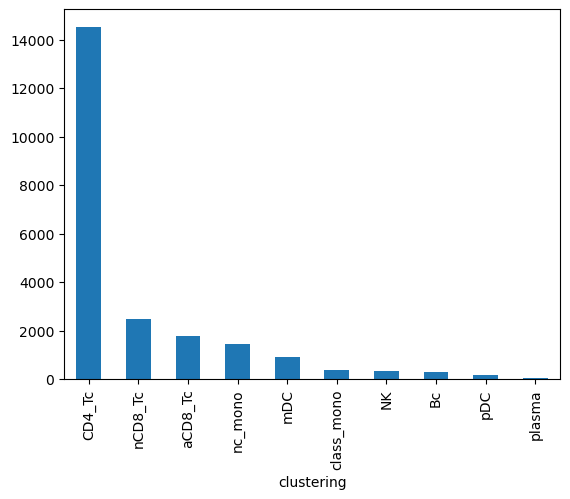

In [47]:
cell_types_df['clustering'].value_counts().plot(kind='bar');

In [48]:
cell_types_df['fineclusters'].unique()

array(['class_mono', 'Tc_3', 'Tc_6', 'nc_mono', 'Tc_2', 'aCD8', 'nCD8',
       'Tc_4', 'mDC1/2', 'pDC', 'Tc_1', 'NK', 'Bc', 'plasma', 'Tc_5'],
      dtype=object)

In [49]:
cell_types_df['fineclusters'].value_counts()

fineclusters
Tc_1          3826
Tc_2          3012
Tc_3          2980
nCD8          2495
Tc_4          2337
Tc_6          2304
aCD8          1761
nc_mono       1458
mDC1/2         930
class_mono     363
NK             319
Bc             308
pDC            155
plasma          55
Tc_5            54
Name: count, dtype: int64

<Axes: xlabel='fineclusters'>

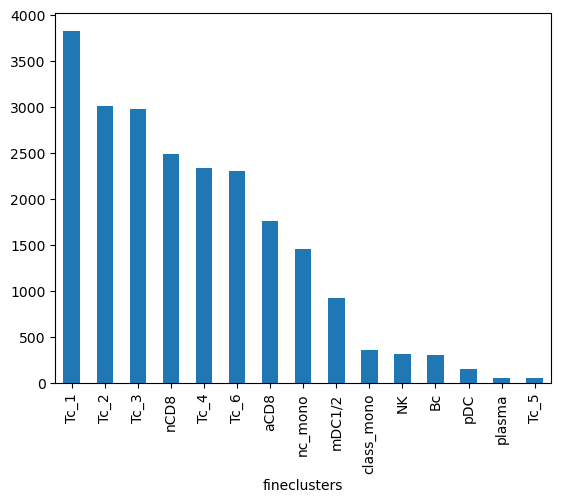

In [50]:
cell_types_df['fineclusters'].value_counts().plot(kind='bar')

In [51]:
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go

In [72]:
def sankey_plot(
        labels,
        labels_titles=None,
        title=None,
        color_palette=sns.color_palette(),
        width=None,
        height=None
    ):
    '''
    This function plots a Sankey diagram of the sets of labels passed as arguments.

    :param labels1: list of labels list
    :param labels2: lables titles
    :param title: title of the plot
    :param color_palette: color palette to use
    '''

    sorted_pairs = sorted(zip(labels[0], labels[1]))
    sorted0, sorted1 = zip(*sorted_pairs)
    labels = [pd.Series(sorted0), pd.Series(sorted1)]

    n_types = [len(set(label_list)) for label_list in labels]

    plot_labels = []
    for i in labels:
        for j in i.unique():
            plot_labels.append(j)

    source = []
    target = []
    value = []
    for i in range(len(labels)-1):
        confusion_matrix = pd.crosstab(labels[i], labels[i+1])
        curr_source = []
        curr_target = []
        curr_value = []

        source_add = 0
        for j in range(0, i):
            source_add += n_types[j]
        target_add = source_add + n_types[i]

        for j in range(n_types[i]):
            for k in range(n_types[i+1]):
                if confusion_matrix.iloc[j, k] != 0:
                    curr_source.append(j+source_add)
                    curr_target.append(k+target_add) #FIXME
                    curr_value.append(confusion_matrix.iloc[j, k])

        source += curr_source
        target += curr_target
        value += curr_value

    colors = []
    for i in range(len(labels)):
        colors += color_palette.as_hex()[:n_types[i]]

    fig = go.Figure(
        data=[
            go.Sankey(
                node = dict(
                    pad = 15,
                    thickness = 20,
                    line = dict(color = "black", width = 0.5),
                    label = plot_labels,
                    color = colors
                ),
                link = dict(
                    source = source,
                    target = target,
                    value = value
                )
            )
        ]
    )

    for x_coordinate, column_name in enumerate(labels_titles):
        fig.add_annotation(
            x=x_coordinate,
            y=1.05,
            xref="x",
            yref="paper",
            text=column_name,
            showarrow=False
        )
    fig.update_layout(
        title_text=title, 
        xaxis={'showgrid': False, 'zeroline': False, 'visible': False},
        yaxis={'showgrid': False, 'zeroline': False, 'visible': False},
        plot_bgcolor='rgba(0,0,0,0)',
        font_size=10,
        width=width,
        height=height
    )

    """file_name = f'../sankey'
    if title is not None:
        camel_title = title.replace(' ', '_')
        file_name += f'_{camel_title}'
    file_name += '.html'
    pyo.plot(fig, filename=file_name, auto_open=False)"""
    fig.show()

In [73]:
sankey_plot(
    [cell_types_df['clustering'], cell_types_df['fineclusters']],
    labels_titles=['Types', 'Sub-types'],
    title='Sankey Plot Cell Types and Sub-types'
)

In [54]:
cell_types_df[cell_types_df['clustering']=='CD4_Tc']['fineclusters'].unique()

array(['Tc_3', 'Tc_6', 'Tc_2', 'Tc_4', 'Tc_1', 'Tc_5'], dtype=object)